## Questão 1
Baixe e carregue o Large Movie Review Dataset. Em seguida, realize o redimensionamento das features utilizando a técnica TF-IDF.

In [ ]:
import tarfile

tar = tarfile.open('db.tar.gz', 'r:gz')
members = tar.getmembers()

for member in members:
    print(member.name)

tar.close()

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import os
import tarfile

def extract_text_from_targz(targz_path):
    """Extrai todos os arquivos .txt das pastas /train/pos e /train/neg de um arquivo tar.gz.

    Args:
        targz_path: O caminho para o arquivo tar.gz.

    Retorno:
        Uma lista de strings, onde cada string é o conteúdo de um arquivo .txt,
        e uma lista com os rótulos correspondentes (1 para positivo, 0 para negativo).
    """
    all_text = []
    labels = []  # Lista para armazenar os rótulos
    with tarfile.open(targz_path, 'r:gz') as tar:
        for member in tar.getmembers():
            if member.isfile() and member.name.endswith('.txt'):
                # Verifica se o arquivo está em /train/pos ou /train/neg
                if member.name.startswith('aclImdb/train/pos/'):
                    labels.append(1)  # Rótulo 1 para positivo
                    with tar.extractfile(member) as f:
                        text = f.read().decode('utf-8')
                        all_text.append(text)
                elif member.name.startswith('aclImdb/train/neg/'):
                    labels.append(0)  # Rótulo 0 para negativo
                    with tar.extractfile(member) as f:
                        text = f.read().decode('utf-8')
                        all_text.append(text)
    return all_text, labels  # Retorna o texto e os rótulos

targz_path = 'db.tar.gz'
documents, labels = extract_text_from_targz(targz_path)  # Obtém o texto e os rótulos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(documents)

tfidf_matrix = vectorizer.transform(documents)

tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3445861 stored elements and shape (25000, 74849)>

## Questão 2
A partir do resultado da Questão 1, exiba as 10 features com os maiores valores de TF-IDF e as 10 com os menores valores de TF-IDF.
Comente o que essas features nos informam (se informam algo relevante) em relação ao objetivo de analisar sentimentos nas resenhas.

In [ ]:
import numpy as np

# pegando os valores de idf
idf_values = vectorizer.idf_

# pegando os nomes das features
feature_names = vectorizer.get_feature_names_out()

# criando uma tupla com os nomes e valores
feature_idf = list(zip(feature_names, idf_values))

# organizando em ordem decrescente para pegarmos os maiores valores
sorted_feature_idf_biggest = sorted(feature_idf, key=lambda item: item[1], reverse=True)

# organizando em ordem crescente (para pegar os menores)
sorted_feature_idf_lowest = sorted(feature_idf, key=lambda item: item[1])


top_10_biggest = sorted_feature_idf_biggest[:10]
top_10_lowest = sorted_feature_idf_lowest[:10]

print("10 Maiores IDF:")
for feature, idf in top_10_biggest:
    print(f"{feature} - IDF: {idf}")

print("\n10 Menores IDF:")
for feature, idf in top_10_lowest:
    print(f"{feature} - IDF: {idf}")

10 Maiores IDF:
0000000000001 - IDF: 10.433523922490414
00015 - IDF: 10.433523922490414
000s - IDF: 10.433523922490414
003830 - IDF: 10.433523922490414
006 - IDF: 10.433523922490414
0079 - IDF: 10.433523922490414
0093638 - IDF: 10.433523922490414
01pm - IDF: 10.433523922490414
020410 - IDF: 10.433523922490414
029 - IDF: 10.433523922490414

10 Menores IDF:
the - IDF: 1.008314135652267
and - IDF: 1.0340105187711748
of - IDF: 1.0522600386726457
to - IDF: 1.0629372013721339
this - IDF: 1.09919757073324
is - IDF: 1.10865023392407
it - IDF: 1.115002017669703
in - IDF: 1.1260568397835082
that - IDF: 1.2070149693526475
but - IDF: 1.329544566505641


As features selecionadas não nos informam nada de relevante. As com maiores valores de IDF são apenas números (a princípio, sem significado) e as com menores valores são apenas preposições, artigos e advérbios. Não há nenhum adjetivo, algo necessário para nos indicar sentimentos negativos ou positivos.

##Questão 3
Utilizando os dados redimensionados da Questão 1, construa um modelo de classificação baseado em Regressão Logística e indique a precisão obtida.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

X = tfidf_matrix
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)
model = LogisticRegressionCV(cv=5, random_state=0, n_jobs=-1, verbose=3, max_iter=300).fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {(accuracy * 100):.2f}%")
print(f"Recall: {(recall * 100):.2f}%")
print(f"Precisão: {(precision * 100):.2f}%")
print(f"F1-Score: {(f1 * 100):.2f}%")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.1s finished


Acurácia: 89.36%
Recall: 90.26%
Precisão: 88.55%
F1-Score: 89.40%


## Questão 4
Crie um gráfico de barras exibindo:

- Os 40 maiores coeficientes da regressão logística construída na Questão 3
- Os 40 menores coeficientes

Algum desses coeficientes parece não ser um indicador claro do sentimento para o qual foi classificado pelo modelo? Comente sua observação.

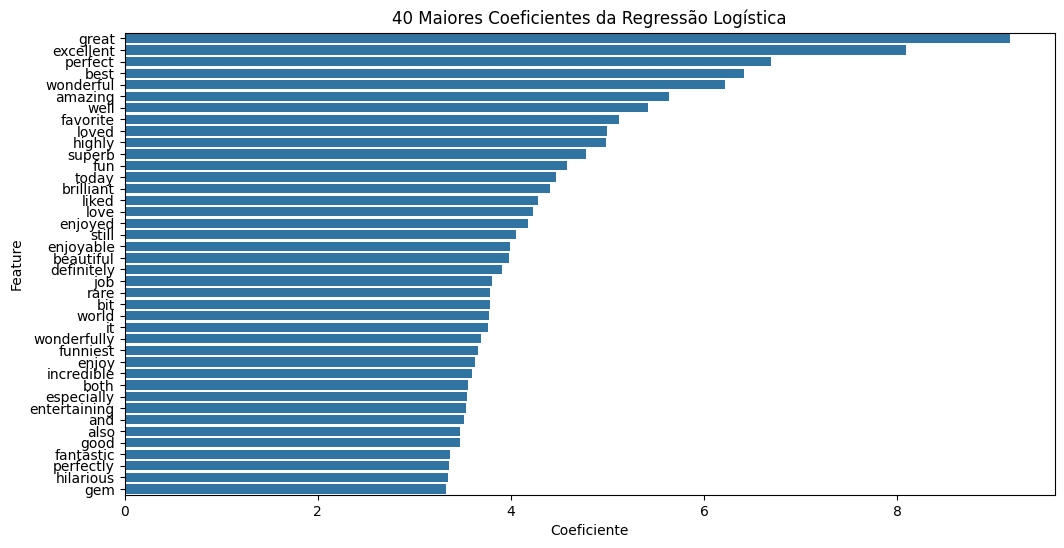

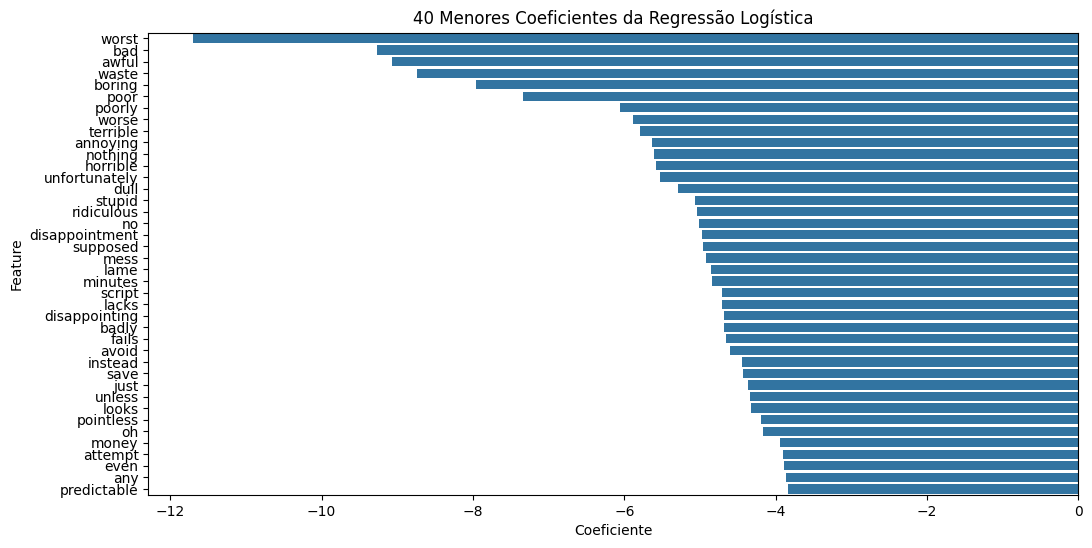

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter os nomes das features
feature_names = vectorizer.get_feature_names_out()

# Obter os coeficientes do modelo
coefficients = model.coef_[0]

# Combinar nomes das features e coeficientes
feature_coefficients = list(zip(feature_names, coefficients))

# Ordenar por coeficientes em ordem decrescente (para os maiores)
sorted_feature_coefficients_biggest = sorted(feature_coefficients, key=lambda item: item[1], reverse=True)

# Ordenar por coeficientes em ordem crescente (para os menores)
sorted_feature_coefficients_lowest = sorted(feature_coefficients, key=lambda item: item[1])

# Obter os 40 maiores e 40 menores coeficientes com seus nomes de features
top_40_biggest = sorted_feature_coefficients_biggest[:40]
top_40_lowest = sorted_feature_coefficients_lowest[:40]

# Criar gráfico de barras para os 40 maiores coeficientes
plt.figure(figsize=(12, 6))
sns.barplot(x=[coef for feature, coef in top_40_biggest], y=[feature for feature, coef in top_40_biggest])
plt.title("40 Maiores Coeficientes da Regressão Logística")
plt.xlabel("Coeficiente")
plt.ylabel("Feature")
plt.show()

# Criar gráfico de barras para os 40 menores coeficientes
plt.figure(figsize=(12, 6))
sns.barplot(x=[coef for feature, coef in top_40_lowest], y=[feature for feature, coef in top_40_lowest])
plt.title("40 Menores Coeficientes da Regressão Logística")
plt.xlabel("Coeficiente")
plt.ylabel("Feature")
plt.show()

Sim, podemos perceber que tanto nos coeficientes positivos quanto nos coeficientes negativos temos palavras que não possuem sentimentos inerentes à elas (por não se tratarem de adjetivos). Como exemplo, nos coeficientes positivos temos "today", "still", "it", "bit" e nos negativos, "nothing", "no", "instead", "oh", "any" e até "attempt". Poderíamos filtrar esses resultados de uma melhor forma se tivéssemos removido as stopwords.

# Parte 2 Vetorização de Variáveis Categóricas

Considere a Tabela abaixo como um toy dataset para as próximas questões.

In [ ]:
import pandas as pd

data = [
    ['Dia', 'Aspecto', 'Temperatura', 'Umidade', 'Vento', 'Jogar Tênis'],
    ['D1', 'Sol', 'Quente', 'Elevada', 'Fraco', 'Não'],
    ['D2', 'Sol', 'Quente', 'Elevada', 'Forte', 'Não'],
    ['D3', 'Nuvens', 'Quente', 'Elevada', 'Fraco', 'Sim'],
    ['D4', 'Chuva', 'Ameno', 'Elevada', 'Fraco', 'Sim'],
    ['D5', 'Chuva', 'Fresco', 'Normal', 'Fraco', 'Sim'],
    ['D6', 'Chuva', 'Fresco', 'Normal', 'Forte', 'Não'],
    ['D7', 'Nuvens', 'Fresco', 'Normal', 'Fraco', 'Sim'],
    ['D8', 'Sol', 'Ameno', 'Elevada', 'Fraco', 'Não'],
    ['D9', 'Sol', 'Fresco', 'Normal', 'Fraco', 'Sim'],
    ['D10', 'Chuva', 'Ameno', 'Normal', 'Forte', 'Sim'],
    ['D11', 'Sol', 'Ameno', 'Normal', 'Forte', 'Sim'],
    ['D12', 'Nuvens', 'Ameno', 'Elevada', 'Forte', 'Sim'],
    ['D13', 'Nuvens', 'Quente', 'Normal', 'Fraco', 'Sim'],
    ['D14', 'Chuva', 'Ameno', 'Elevada', 'Forte', 'Não']
]

df = pd.DataFrame(data[1:], columns=data[0])
df = df.drop(columns=['Dia'])
df

,Aspecto,Temperatura,Umidade,Vento,Jogar Tênis
0,Sol,Quente,Elevada,Fraco,Não
1,Sol,Quente,Elevada,Forte,Não
2,Nuvens,Quente,Elevada,Fraco,Sim
3,Chuva,Ameno,Elevada,Fraco,Sim
4,Chuva,Fresco,Normal,Fraco,Sim
5,Chuva,Fresco,Normal,Forte,Não
6,Nuvens,Fresco,Normal,Fraco,Sim
7,Sol,Ameno,Elevada,Fraco,Não
8,Sol,Fresco,Normal,Fraco,Sim
9,Chuva,Ameno,Normal,Forte,Sim


## Questão 5
Vetorize as variáveis categóricas da Tabela 1 utilizando a técnica de One-Hot Encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['Aspecto', 'Temperatura', 'Umidade', 'Vento']
encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df

,Aspecto_Chuva,Aspecto_Nuvens,Aspecto_Sol,Temperatura_Ameno,Temperatura_Fresco,Temperatura_Quente,Umidade_Elevada,Umidade_Normal,Vento_Forte,Vento_Fraco
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Questão 6
Vetorize as variáveis categóricas da Tabela 1 utilizando a técnica de Dummy Encoding.

In [ ]:
dummy_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
dummy_df = dummy_df.replace({True: 1, False: 0})
dummy_df
#defaults: Aspecto: chuva / Temperatura: Ameno / Umidade: Elevada / Vento: Forte

<ipython-input-43-ca47719ec87c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df = dummy_df.replace({True: 1, False: 0})


,Jogar Tênis,Aspecto_Nuvens,Aspecto_Sol,Temperatura_Fresco,Temperatura_Quente,Umidade_Normal,Vento_Fraco
0,Não,0,1,0,1,0,1
1,Não,0,1,0,1,0,0
2,Sim,1,0,0,1,0,1
3,Sim,0,0,0,0,0,1
4,Sim,0,0,1,0,1,1
5,Não,0,0,1,0,1,0
6,Sim,1,0,1,0,1,1
7,Não,0,1,0,0,0,1
8,Sim,0,1,1,0,1,1
9,Sim,0,0,0,0,1,0


## Questão 7
Vetorize as variáveis categóricas da Tabela 1 utilizando a técnica de Effect Encoding.

In [ ]:
effect_df = dummy_df.copy()

def effect_encoding2(col1, col2):
  for index, row in effect_df.iterrows():
    if row[col1] == 0 and row[col2] == 0:
      effect_df.loc[index, col1] = -1
      effect_df.loc[index, col2] = -1

def effect_encoding(col1):
  for index, row in effect_df.iterrows():
    if row[col1] == 0:
      effect_df.loc[index, col1] = -1


effect_encoding2('Aspecto_Sol', 'Aspecto_Nuvens')
effect_encoding2('Temperatura_Quente', 'Temperatura_Fresco')
effect_encoding('Umidade_Normal')
effect_encoding('Vento_Fraco')
effect_df


,Jogar Tênis,Aspecto_Nuvens,Aspecto_Sol,Temperatura_Fresco,Temperatura_Quente,Umidade_Normal,Vento_Fraco
0,Não,0,1,0,1,-1,1
1,Não,0,1,0,1,-1,-1
2,Sim,1,0,0,1,-1,1
3,Sim,-1,-1,-1,-1,-1,1
4,Sim,-1,-1,1,0,1,1
5,Não,-1,-1,1,0,1,-1
6,Sim,1,0,1,0,1,1
7,Não,0,1,-1,-1,-1,1
8,Sim,0,1,1,0,1,1
9,Sim,-1,-1,-1,-1,1,-1


## Questão 8
Compare os resultados obtidos nas questões 5, 6 e 7. Organize a comparação em uma tabela e comente as principais diferenças entre os métodos.

In [ ]:
table_data = [
    ['Aspecto', 'Sol', "Aspecto_Sol = 1, Aspecto_Nuvens = 0, Aspecto_Chuva = 0", "Aspecto_Sol = 1, Aspecto_Nuvens = 0", "Aspecto_Sol = 1, Aspecto_Nuvens = 0, Aspecto_Chuva = -1"],
    ['Aspecto', 'Nuvens', "Aspecto_Sol = 0, Aspecto_Nuvens = 1, Aspecto_Chuva = 0", "Aspecto_Sol = 0, Aspecto_Nuvens = 1", "Aspecto_Sol = 0, Aspecto_Nuvens = 1, Aspecto_Chuva = -1"],
    ['Aspecto', 'Chuva', "Aspecto_Sol = 0, Aspecto_Nuvens = 0, Aspecto_Chuva = 1", "Aspecto_Sol = 0, Aspecto_Nuvens = 0", "Aspecto_Sol = -1, Aspecto_Nuvens = -1, Aspecto_Chuva = 1"],
    ['Temperatura', 'Quente', "Temperatura_Quente = 1, Temperatura_Ameno = 0, Temperatura_Fresco = 0", "Temperatura_Quente = 1, Temperatura_Fresco = 0", "Temperatura_Quente = 1, Temperatura_Ameno = -1, Temperatura_Fresco = 0"],
    ['Temperatura', 'Ameno', "Temperatura_Quente = 0, Temperatura_Ameno = 1, Temperatura_Fresco = 0", "Temperatura_Quente = 0, Temperatura_Fresco = 0", "Temperatura_Quente = 0, Temperatura_Ameno = 1, Temperatura_Fresco = 0"],
    ['Temperatura', 'Fresco', "Temperatura_Quente = 0, Temperatura_Ameno = 0, Temperatura_Fresco = 1", "Temperatura_Quente = 0, Temperatura_Fresco = 1", "Temperatura_Quente = -1, Temperatura_Ameno = -1, Temperatura_Fresco = 1"],
    ['Umidade', 'Elevada', "Umidade_Elevada = 1, Umidade_Normal = 0", "Umidade_Elevada = 1", "Umidade_Elevada = 1, Umidade_Normal = -1"],
    ['Umidade', 'Normal', "Umidade_Elevada = 0, Umidade_Normal = 1", "Umidade_Elevada = 0", "Umidade_Elevada = -1, Umidade_Normal = 1"],
    ['Vento', 'Fraco', "Vento_Fraco = 1, Vento_Forte = 0", "Vento_Fraco = 1", "Vento_Fraco = 1, Vento_Forte = -1"],
    ['Vento', 'Forte', "Vento_Fraco = 0, Vento_Forte = 1", "Vento_Fraco = 0", "Vento_Fraco = -1, Vento_Forte = 1"],
]

# Create the comparison table DataFrame
comparison_table = pd.DataFrame(table_data, columns=['Feature', 'Valor original', 'One-Hot Encoding', 'Dummy Encoding', 'Effect Encoding'])
comparison_table

,Feature,Valor original,One-Hot Encoding,Dummy Encoding,Effect Encoding
0,Aspecto,Sol,"Aspecto_Sol = 1, Aspecto_Nuvens = 0, Aspecto_C...","Aspecto_Sol = 1, Aspecto_Nuvens = 0","Aspecto_Sol = 1, Aspecto_Nuvens = 0, Aspecto_C..."
1,Aspecto,Nuvens,"Aspecto_Sol = 0, Aspecto_Nuvens = 1, Aspecto_C...","Aspecto_Sol = 0, Aspecto_Nuvens = 1","Aspecto_Sol = 0, Aspecto_Nuvens = 1, Aspecto_C..."
2,Aspecto,Chuva,"Aspecto_Sol = 0, Aspecto_Nuvens = 0, Aspecto_C...","Aspecto_Sol = 0, Aspecto_Nuvens = 0","Aspecto_Sol = -1, Aspecto_Nuvens = -1, Aspecto..."
3,Temperatura,Quente,"Temperatura_Quente = 1, Temperatura_Ameno = 0,...","Temperatura_Quente = 1, Temperatura_Fresco = 0","Temperatura_Quente = 1, Temperatura_Ameno = -1..."
4,Temperatura,Ameno,"Temperatura_Quente = 0, Temperatura_Ameno = 1,...","Temperatura_Quente = 0, Temperatura_Fresco = 0","Temperatura_Quente = 0, Temperatura_Ameno = 1,..."
5,Temperatura,Fresco,"Temperatura_Quente = 0, Temperatura_Ameno = 0,...","Temperatura_Quente = 0, Temperatura_Fresco = 1","Temperatura_Quente = -1, Temperatura_Ameno = -..."
6,Umidade,Elevada,"Umidade_Elevada = 1, Umidade_Normal = 0",Umidade_Elevada = 1,"Umidade_Elevada = 1, Umidade_Normal = -1"
7,Umidade,Normal,"Umidade_Elevada = 0, Umidade_Normal = 1",Umidade_Elevada = 0,"Umidade_Elevada = -1, Umidade_Normal = 1"
8,Vento,Fraco,"Vento_Fraco = 1, Vento_Forte = 0",Vento_Fraco = 1,"Vento_Fraco = 1, Vento_Forte = -1"
9,Vento,Forte,"Vento_Fraco = 0, Vento_Forte = 1",Vento_Fraco = 0,"Vento_Fraco = -1, Vento_Forte = 1"


1. One-Hot Encoding

  Características:

- Cria uma coluna binária para cada categoria da variável categórica.

- Cada coluna indica a presença (1) ou ausência (0) de uma categoria.

- A categoria de referência é explicitamente representada por uma coluna.


---


2. Dummy Encoding

  Características:

- Similar ao One-Hot Encoding, mas remove a coluna da categoria de referência.

- A categoria de referência é implicitamente representada por todas as colunas com valor 0.



---

3. Effect Encoding

  Características:

- Similar ao Dummy Encoding, mas a categoria de referência é representada por -1 em todas as colunas.

- Mantém a informação da categoria de referência de forma implícita.

## Questão 9
Com base nos resultados das questões 5, 6 e 7, explique quais são as vantagens da vetorização de variáveis categóricas.

A vetorização de variáveis categóricas se faz necessária pois a maioria dos modelos de ML não funciona com dados não-numéricos. Sua transformação em variáveis numéricas também pode capturar relações intrínsecas entre as variáveis (algo que os humanos conseguem perceber, mas não as máquinas - como a relação entre temperatura amena, fresca e quente). Outras vantagens incluem a diminuição de viéses e a possibilidade de aplicação de transformadores nos dados convertidos.

## Questão 10
Agora, explique quais seriam as possíveis desvantagens da vetorização de variáveis categóricas, considerando os mesmos resultados.

A vetorização pode aumentar a dimensionalidade dos dados (especialmente no caso do One-Hot Encoding), o que torna o modelo mais complexo e computacionalmente mais caro, além de aumentar o risco de overfitting. Outro problema frequente é a multicolinearidade (dependência entre as colunas), o que atrapalha o desempenho de modelos lineares. No Dummy Encoding, também temos a remoção da categoria de referência, o que dificulta a interpretação dos dados por humanos e também pode atrapalhar o desempenho do modelo.

# Parte 3 Outras Técnicas de Transformação de Features


## Questão 11
Explique o que é e demonstre como pode ser utilizada a técnica de Feature Hashing. Para a demonstração, utilize os dados do toy dataset representado pela Tabela 1.

O Feature Hashing é uma técnica poderosa para vetorizar variáveis categóricas, especialmente quando lidamos com alta cardinalidade. Ele reduz a dimensionalidade e melhora a eficiência computacional, mas pode levar a colisões de hash e perda de informação.

In [ ]:
from sklearn.feature_extraction import FeatureHasher
from sys import getsizeof
n_features_dict = {col: len(df[col].unique()) for col in categorical_cols}

# Aplicando o Feature Hashing em cada coluna categórica
hashed_dfs = []
for col in categorical_cols:
    # Convertendo a coluna em uma lista de listas de strings
    col_data = df[col].apply(lambda x: [x]).tolist()

    # Aplicando o Feature Hashing
    hasher = FeatureHasher(n_features=n_features_dict[col], input_type='string')
    hashed_features = hasher.transform(col_data).toarray()

    # Criando um DataFrame com os resultados
    hashed_df = pd.DataFrame(hashed_features, columns=[f'{col}_Hash_{i}' for i in range(n_features_dict[col])])
    hashed_dfs.append(hashed_df)

# Concatenando todos os DataFrames hashed com o DataFrame original
result_df = pd.concat([df.reset_index(drop=True)] + hashed_dfs, axis=1)

result_df

,Aspecto,Temperatura,Umidade,Vento,Jogar Tênis,Aspecto_Hash_0,Aspecto_Hash_1,Aspecto_Hash_2,Temperatura_Hash_0,Temperatura_Hash_1,Temperatura_Hash_2,Umidade_Hash_0,Umidade_Hash_1,Vento_Hash_0,Vento_Hash_1
0,Sol,Quente,Elevada,Fraco,Não,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,1.0
1,Sol,Quente,Elevada,Forte,Não,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,-1.0
2,Nuvens,Quente,Elevada,Fraco,Sim,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,1.0
3,Chuva,Ameno,Elevada,Fraco,Sim,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,Chuva,Fresco,Normal,Fraco,Sim,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,1.0
5,Chuva,Fresco,Normal,Forte,Não,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-1.0
6,Nuvens,Fresco,Normal,Fraco,Sim,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,1.0
7,Sol,Ameno,Elevada,Fraco,Não,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,Sol,Fresco,Normal,Fraco,Sim,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,1.0
9,Chuva,Ameno,Normal,Forte,Sim,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0


In [1]:
# Comparando o uso de memória
print('\nUso de memória:')
for col in categorical_cols:
    original_size = getsizeof(df[col])
    hashed_size = getsizeof(result_df[[f'{col}_Hash_{i}' for i in range(n_features_dict[col])]])
    print(f'{col}:')
    print(f'  - Original: {original_size} bytes')
    print(f'  - Hashed: {hashed_size} bytes')


Uso de memória:


NameError: name 'categorical_cols' is not defined

## Questão 12
Explique o que é e demonstre como pode ser utilizada a técnica de Bin Counting. Para a demonstração, utilize os dados do toy dataset representado pela Tabela 1.

O Bin Counting é uma técnica poderosa de engenharia de features que substitui valores categóricos por estatísticas derivadas de dados históricos, como probabilidades condicionais, contagens ou outras métricas associadas ao target.

Como funciona?

1. Cálculo de Estatísticas:

- Para cada categoria de uma variável categórica, calculamos estatísticas associadas ao target.

  - Por exemplo, se o target for binário (0 ou 1), podemos calcular:

    - A probabilidade condicional do target ser 1 dado a categoria.

    - O número de ocorrências da categoria.

    - A razão de chances (log odds ratio).

2. Substituição das Categorias:

- Em vez de usar a categoria original, substituímos cada categoria por sua estatística calculada (por exemplo, a probabilidade condicional).

3. Aplicação:

- Essas estatísticas são usadas como features numéricas no modelo de machine learning.

In [ ]:
bin_df = df.copy()

for col in categorical_cols:
    # Calculando a probabilidade condicional de 'Jogar Tênis = Sim' para cada categoria
    prob_map = bin_df.groupby(col)['Jogar Tênis'].apply(lambda x: (x == 'Sim').mean()).to_dict()

    # Substituindo cada categoria pela sua probabilidade condicional
    bin_df[f'{col}_Prob'] = bin_df[col].map(prob_map)


bin_df

,Aspecto,Temperatura,Umidade,Vento,Jogar Tênis,Aspecto_Prob,Temperatura_Prob,Umidade_Prob,Vento_Prob,Jogar Tênis_Prob
0,Sol,Quente,Elevada,Fraco,Não,0.4,0.500000,0.428571,0.75,0.0
1,Sol,Quente,Elevada,Forte,Não,0.4,0.500000,0.428571,0.50,0.0
2,Nuvens,Quente,Elevada,Fraco,Sim,1.0,0.500000,0.428571,0.75,1.0
3,Chuva,Ameno,Elevada,Fraco,Sim,0.6,0.666667,0.428571,0.75,1.0
4,Chuva,Fresco,Normal,Fraco,Sim,0.6,0.750000,0.857143,0.75,1.0
5,Chuva,Fresco,Normal,Forte,Não,0.6,0.750000,0.857143,0.50,0.0
6,Nuvens,Fresco,Normal,Fraco,Sim,1.0,0.750000,0.857143,0.75,1.0
7,Sol,Ameno,Elevada,Fraco,Não,0.4,0.666667,0.428571,0.75,0.0
8,Sol,Fresco,Normal,Fraco,Sim,0.4,0.750000,0.857143,0.75,1.0
9,Chuva,Ameno,Normal,Forte,Sim,0.6,0.666667,0.857143,0.50,1.0
